<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui - Cedric Goeury&nbsp;</span><br/>
___

# Printing statistics related to the results

This tutorial is intended for people who want an example showing how to get statistical information the simulation results.

## Printing statistics related to a field in one point

In [1]:
from os import chdir, environ, path
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np

To compute statistics, we suggest using the pandas library.

In [2]:
try:
    import pandas as pd
except ImportError:
    raise Exception("Warning: pandas is mandatory for this exmaple")

Let us use the yen_multi example of GAIA.

In [3]:
file_name = path.join(environ['HOMETEL'], 
                          'notebooks', 
                          'data',
                          'gaia_yen-exp_multi1.slf')

res = TelemacFile(file_name)

# Getting array of time values from file 
times = res.times

The results look like this:

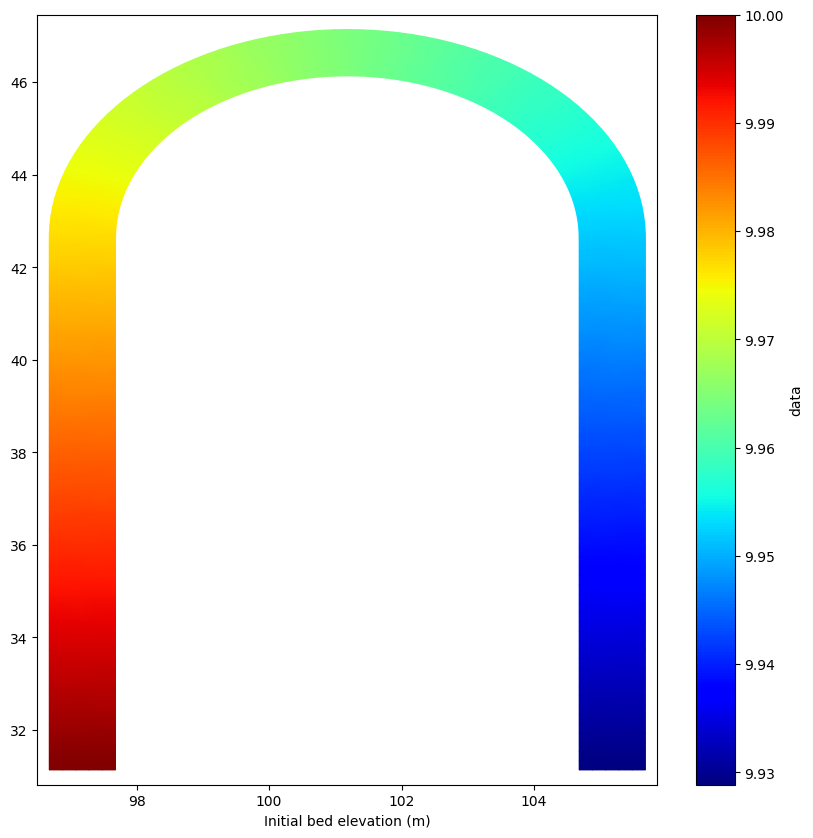

In [4]:
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map

# Initialising matplotlib figure
fig1, ax1 = plt.subplots(figsize=(10, 10))

data = res.get_data_value('BOTTOM', 0)

# Plotting scalar map
plot2d_scalar_map(fig1, ax1, res.tri, data, 'Initial bed elevation (m)')
    
# Showing the plot
plt.show()

Then, a point where to extract data and print stats.

In [5]:
# Point where we want to display stats
point = np.array([[101.25,46.34]])

# Getting solid discharge values over time for each node in nodes
solid_discharge = res.get_timeseries_on_points('SOLID DISCH', point)

Print the stats

In [6]:
# solid_discharge is always an array because we can extract on several points
# so here we take the value in zero
df = pd.Series(solid_discharge[0], index=times)

Now compute the integration of the solid discharge along the line:

In [7]:
print(df.describe())

count    19.000000
mean      0.024611
std       0.008938
min       0.006267
25%       0.017637
50%       0.026008
75%       0.032865
max       0.035488
dtype: float64


To visualise the results, let us plot the evolution of the solid discharge integrated on the line.

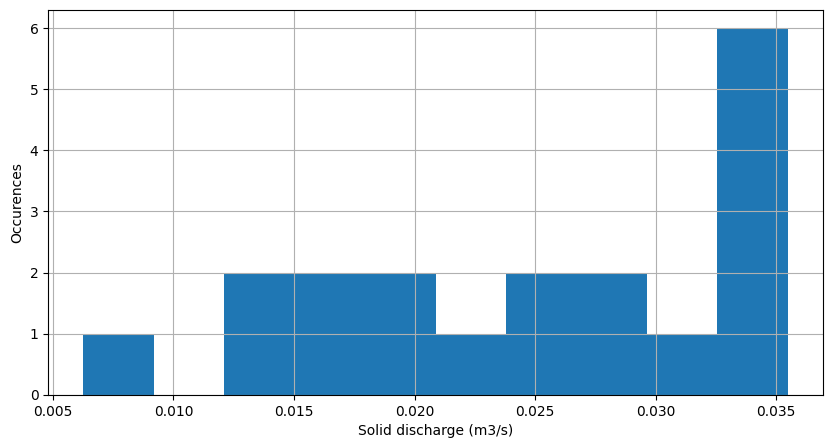

/tmp/ipykernel_465556/2656571167.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, bins=n_bins)


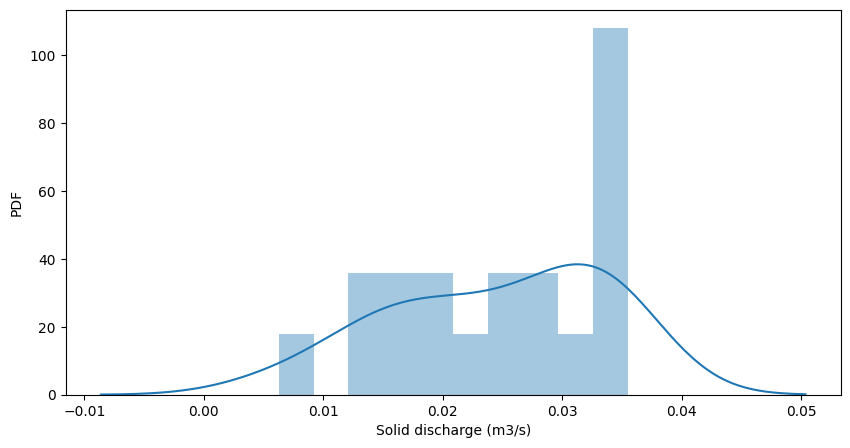

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("Solid discharge (m3/s)")
ax.set_ylabel("Occurences")
# A first histogram to check the occurences of values for the solid discharge
n_bins = 10
df.hist(ax=ax, bins=n_bins)
plt.show()
plt.close(fig)
try:
    import seaborn as sns
    # A nicer plot with the density probability
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_xlabel("Solid discharge (m3/s)")
    ax.set_ylabel("PDF")
    sns.distplot(df, bins=n_bins)
    plt.show()
    plt.close(fig)
except ImportError:
    print("seaborn is necessary to do the nicer plot")